In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data2015 = pd.read_csv('/Users/usamaali/Pictures/2015.csv')

In [3]:
data2016 = pd.read_csv('/Users/usamaali/Pictures/2016.csv')

In [4]:
data2017 = pd.read_csv('/Users/usamaali/Pictures/2017.csv')

In [5]:
data2018 = pd.read_csv('/Users/usamaali/Pictures/2018.csv')

In [6]:
data2019 = pd.read_csv('/Users/usamaali/Pictures/2019.csv')

In [9]:
# Added a 'year' column into each dataset 
data2015['year'] = '2015'
data2016['year'] = '2016'
data2017['year'] = '2017'
data2018['year'] = '2018'
data2019['year'] = '2019'

pd.to_datetime(data2015.year)
pd.to_datetime(data2016.year)
pd.to_datetime(data2017.year)
pd.to_datetime(data2018.year)
pd.to_datetime(data2019.year)

0     2019-01-01
1     2019-01-01
2     2019-01-01
3     2019-01-01
4     2019-01-01
         ...    
151   2019-01-01
152   2019-01-01
153   2019-01-01
154   2019-01-01
155   2019-01-01
Name: year, Length: 156, dtype: datetime64[ns]

In [10]:
# 2. Identified the columns that were relvant for my analysis, and present in all five datasets. Any column that was not relevant or not in all five datasets was dropped. 
columns_to_drop2015 = [
    'Region', 'Standard Error', 'Dystopia Residual'
]

columns_to_drop2016 = [
    'Region', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'
]

columns_to_drop2017 = [
    'Whisker.high', 'Whisker.low', 'Dystopia.Residual'
]

#no cols to drop for 2018 and 2019

data2015.drop(columns_to_drop2015, axis='columns', inplace=True)
data2016.drop(columns_to_drop2016, axis='columns', inplace=True)
data2017.drop(columns_to_drop2017, axis='columns', inplace=True)

In [11]:
#3. Reorded the columns in all five data sets to ensure all columns were in the same order
data2017 = data2017.iloc[:, [0,1,2,3,4,5,6,8,7,9]]
data2018 = data2018.iloc[:, [1,0,2,3,4,5,6,8,7,9]]
data2019 = data2019.iloc[:, [1,0,2,3,4,5,6,8,7,9]]

In [12]:
#4. Standardized the naming conventions of the coumns across all five data sets
data2015 = data2015.rename(columns={'Country': 'country', 'Happiness Rank': 'happiness_rank', 'Happiness Score': 'happiness_score', 'Economy (GDP per Capita)': 'GDP_per_capita', \
                                    'Family': 'social_support', 'Health (Life Expectancy)' : 'healthy_life_expectancy', 'Freedom': 'freedom', \
                                    'Trust (Government Corruption)': 'absence_of_corruption', 'Generosity': 'generosity'})

data2016 = data2016.rename(columns={'Country': 'country', 'Happiness Rank': 'happiness_rank', 'Happiness Score': 'happiness_score', 'Economy (GDP per Capita)': 'GDP_per_capita', \
                                    'Family': 'social_support', 'Health (Life Expectancy)' : 'healthy_life_expectancy', 'Freedom': 'freedom', \
                                    'Trust (Government Corruption)': 'absence_of_corruption', 'Generosity': 'generosity'})

data2017 = data2017.rename(columns={'Country': 'country', 'Happiness.Rank': 'happiness_rank', 'Happiness.Score': 'happiness_score', 'Economy..GDP.per.Capita.': 'GDP_per_capita', \
                                    'Family': 'social_support', 'Health..Life.Expectancy.' : 'healthy_life_expectancy', 'Freedom': 'freedom', \
                                    'Trust..Government.Corruption.': 'absence_of_corruption', 'Generosity': 'generosity'})

data2018 = data2018.rename(columns={'Country or region': 'country', 'Overall rank': 'happiness_rank', 'Score': 'happiness_score', 'GDP per capita': 'GDP_per_capita', \
                                    'Social support': 'social_support', 'Healthy life expectancy' : 'healthy_life_expectancy', 'Freedom to make life choices': 'freedom', \
                                    'Perceptions of corruption': 'absence_of_corruption', 'Generosity': 'generosity'})

data2019 = data2019.rename(columns={'Country or region': 'country', 'Overall rank': 'happiness_rank', 'Score': 'happiness_score', 'GDP per capita': 'GDP_per_capita', \
                                    'Social support': 'social_support', 'Healthy life expectancy' : 'healthy_life_expectancy', 'Freedom to make life choices': 'freedom', \
                                    'Perceptions of corruption': 'absence_of_corruption', 'Generosity': 'generosity'})

In [13]:
#5. Combined the five datasets into one
combined_data = pd.concat([data2015, data2016, data2017, data2018, data2019])
combined_data.head()

,country,happiness_rank,happiness_score,GDP_per_capita,social_support,healthy_life_expectancy,freedom,absence_of_corruption,generosity,year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [14]:
#Check for null values, determined that there is one null in the perceptions_of_corruption column
print('combined_data:', combined_data.isnull().sum())

combined_data: country                    0
happiness_rank             0
happiness_score            0
GDP_per_capita             0
social_support             0
healthy_life_expectancy    0
freedom                    0
absence_of_corruption      1
generosity                 0
year                       0
dtype: int64


In [15]:
#Inspect the row with the null value. Determined that it is for UAE, year 2018
combined_data[combined_data['absence_of_corruption'].isnull()]

,country,happiness_rank,happiness_score,GDP_per_capita,social_support,healthy_life_expectancy,freedom,absence_of_corruption,generosity,year
19,United Arab Emirates,20,6.774,2.096,0.776,0.67,0.284,NaN,0.186,2018


In [16]:
#Find the average perceptions_of_corruption value for the UAE
UAE_corruption = combined_data[combined_data['country'] == 'United Arab Emirates']
UAE_corruption_avg = UAE_corruption['absence_of_corruption'].mean()

#Fill in the null with the avergage perceptions_of_corruption value for the UAE
combined_data.fillna({'absence_of_corruption': UAE_corruption_avg}, inplace=True)

#Check 
combined_data[combined_data['country'] == 'United Arab Emirates']

,country,happiness_rank,happiness_score,GDP_per_capita,social_support,healthy_life_expectancy,freedom,absence_of_corruption,generosity,year
19,United Arab Emirates,20,6.901,1.427270,1.12575,0.809250,0.641570,0.385830,0.264280,2015
27,United Arab Emirates,28,6.573,1.573520,0.87114,0.729930,0.562150,0.355610,0.265910,2016
20,United Arab Emirates,21,6.648,1.626343,1.26641,0.726798,0.608345,0.324490,0.360942,2017
19,United Arab Emirates,20,6.774,2.096000,0.77600,0.670000,0.284000,0.311982,0.186000,2018
20,United Arab Emirates,21,6.825,1.503000,1.31000,0.825000,0.598000,0.182000,0.262000,2019


In [17]:
#Find the average happiness scores of all countries grouped by year
happiness_score_by_year = combined_data.groupby(['year'])
happiness_score_by_year = happiness_score_by_year.mean()
happiness_score_by_year = pd.DataFrame(happiness_score_by_year,columns=['happiness_score'])
print (happiness_score_by_year)

      happiness_score
year                 
2015         5.375734
2016         5.382185
2017         5.354019
2018         5.375917
2019         5.407096


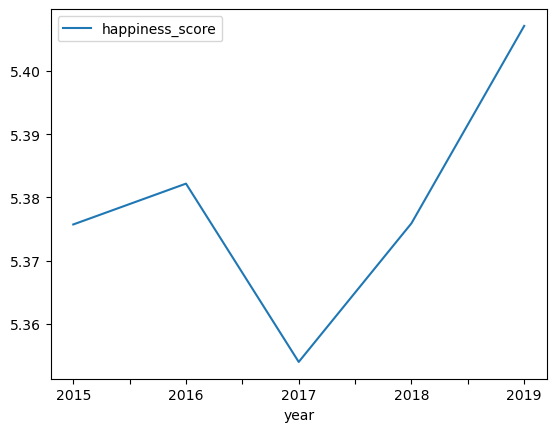

In [18]:
#Plot the happiness scores of all countries grouped by year
happiness_score_by_year.plot();

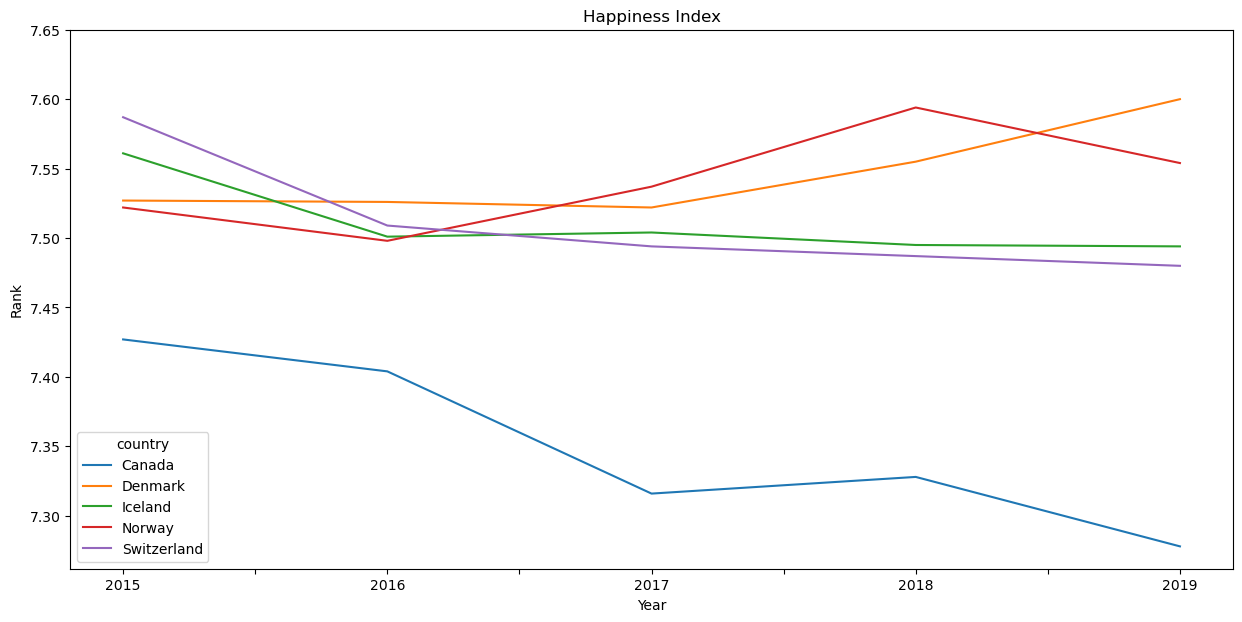

In [23]:
#Identify 2015 happist countries
happiest_countries_2015 = combined_data[(combined_data.happiness_rank < 6) & (combined_data.year == '2015')]
#Filter combined data for 5 happiest countires from 2015
happiest_countries = combined_data[(combined_data.country == 'Switzerland') | (combined_data.country == 'Iceland') | (combined_data.country == 'Denmark') | (combined_data.country == 'Norway') | (combined_data.country == 'Canada')]

#Plot happiness scores
fig, ax = plt.subplots(figsize=(15,7))
 
happiest_countries.groupby(['year','country']).mean()['happiness_score'].unstack().plot(ax=ax)
plt.xlabel('Year')
plt.ylabel('Rank')
plt.title('Happiness Index')
plt.yticks(np.arange(7.30, 7.65, 0.05));